# Working on Real Life Data with Pandas

In this project, we will be getting and analyzing real life data using Pandas.

In the first cell below, we simply import Pandas and refer to it as pd for brewity.
The line "%matplotlib inline" is used to make figures appear within the jupyter notebook
(as opposed to openning them with an external viewer). In some cases, this is the default option and it is not necessary.

In [43]:
%matplotlib inline

import pandas as pd

## Earthquakes in the last 30 days

In the next cell, we get a summary of all the earthquakes that happened in the last 30 days in the US. We obtain this data from usgs.gov using the url https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv. Whenever you access this url, it gives you a .csv file (extension is short for Comma-Separated Values even thought they are not always comma separated) containing data for the most recent 30 days.

The method .read_csv is used to read the contents of the url. The last line simply displays a summary of the data frame.

Note that each time you run the next cell, you will be downloading the data. We should use the data frame in different cells once it is read to be kind to USGS :)

Please run the following cell and take a minute to inspect the data. What columns are there? Take a look at some of the rows.

In [59]:
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"

df_Earthquakes = pd.read_csv(url)

df_Earthquakes

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-08-04T21:42:46.330Z,33.935833,-115.986333,0.43,1.61,ml,31.0,149.00,0.065350,0.2100,...,2020-08-04T21:46:37.727Z,"24km SSE of Twentynine Palms, CA",earthquake,0.38,0.68,0.134,25.0,automatic,ci,ci
1,2020-08-04T21:40:13.450Z,38.808998,-122.792831,2.55,1.02,md,22.0,42.00,0.002188,0.0300,...,2020-08-04T21:49:03.853Z,"5km NW of The Geysers, CA",earthquake,0.24,0.42,0.110,4.0,automatic,nc,nc
2,2020-08-04T21:38:31.380Z,36.765800,-115.868700,9.30,0.60,ml,10.0,233.95,0.077000,0.0800,...,2020-08-04T21:50:49.529Z,"28 km NW of Indian Springs, Nevada",earthquake,NaN,1.80,NaN,NaN,automatic,nn,nn
3,2020-08-04T21:28:36.570Z,36.346668,-120.331497,2.56,3.21,ml,71.0,103.00,0.331500,0.1400,...,2020-08-04T21:52:03.873Z,"18km S of Cantua Creek, CA",earthquake,0.24,1.32,0.199,22.0,automatic,nc,nc
4,2020-08-04T21:26:36.590Z,38.197300,-117.900500,6.30,1.00,ml,8.0,81.89,0.033000,0.0600,...,2020-08-04T21:30:28.645Z,"28 km SE of Mina, Nevada",earthquake,NaN,0.80,NaN,NaN,automatic,nn,nn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14228,2020-07-05T22:08:57.660Z,38.134200,-118.051200,1.00,1.00,ml,13.0,159.67,0.074000,0.2200,...,2020-07-05T22:28:38.677Z,"28 km S of Mina, Nevada",earthquake,NaN,15.60,NaN,NaN,automatic,nn,nn
14229,2020-07-05T22:05:38.956Z,44.118800,-115.066500,10.00,2.90,ml,NaN,79.00,0.267000,1.0200,...,2020-07-08T04:03:35.040Z,"14 km SW of Stanley, Idaho",earthquake,2.30,2.00,0.055,44.0,reviewed,us,us
14230,2020-07-05T22:04:34.060Z,38.120000,-118.055200,1.80,2.00,ml,17.0,64.23,0.040000,0.1708,...,2020-07-08T03:58:39.040Z,"30 km S of Mina, Nevada",earthquake,NaN,1.00,0.260,2.0,reviewed,nn,nn
14231,2020-07-05T22:04:17.775Z,38.119600,-118.057800,1.80,1.70,ml,20.0,115.15,0.041000,0.1377,...,2020-07-07T23:19:02.421Z,"30 km S of Mina, Nevada",earthquake,NaN,0.90,0.010,2.0,reviewed,nn,nn


Did you realize that not all the columns are displayed? How do we see which columns there are?

.columns attribute should help.

(A description of columns can be found at [USGS's web page here](https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php).)

In [87]:
print(df_Earthquakes.columns)
print(df_Earthquakes.columns.size)

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')
22


By default, Jupyter Notebook only displays the result of the last evaluation after the cell unless there are explicit print/display commands. This is the reason we used print statements in the previous cell.

Okay, now what if we just wanted to see the first 3 rows to quickly check something? The next cell shows us how to do this. Try changing the number and run the cell again. What happens if you call the method without providing a number?

In [123]:
df_Earthquakes.head(3)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-08-04T21:42:46.330Z,33.935833,-115.986333,0.43,1.61,ml,31.0,149.00,0.065350,0.21,...,2020-08-04T21:46:37.727Z,"24km SSE of Twentynine Palms, CA",earthquake,0.38,0.68,0.134,25.0,automatic,ci,ci
1,2020-08-04T21:40:13.450Z,38.808998,-122.792831,2.55,1.02,md,22.0,42.00,0.002188,0.03,...,2020-08-04T21:49:03.853Z,"5km NW of The Geysers, CA",earthquake,0.24,0.42,0.110,4.0,automatic,nc,nc
2,2020-08-04T21:38:31.380Z,36.765800,-115.868700,9.30,0.60,ml,10.0,233.95,0.077000,0.08,...,2020-08-04T21:50:49.529Z,"28 km NW of Indian Springs, Nevada",earthquake,NaN,1.80,NaN,NaN,automatic,nn,nn


What about the last 3 rows? It is time for you to Google this if you don't already know the answer.

In [124]:
# write your code in this cell

Of course, it is hard to make sense of the data simply by looking at each individual row, especially when there is so much data. So, we ask Pandas to "describe" it for us. The method .describe gives us various information on numerical columns. 

In [125]:
df_Earthquakes.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,14233.000000,14233.000000,14233.000000,14231.000000,10228.000000,11430.000000,10578.000000,14232.000000,8568.000000,14232.000000,9053.000000,9378.000000
mean,39.440007,-116.344770,18.102331,1.453852,19.328119,113.522851,0.414448,0.255649,1.456765,7.479671,0.221670,15.648326
std,16.287667,54.816458,46.367751,1.113915,13.775948,55.037795,1.861266,0.257895,2.797794,612.692883,0.321722,29.333225
min,-65.352200,-179.976200,-3.510000,-1.430000,2.000000,13.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000
25%,35.690167,-148.127600,3.600000,0.760000,10.000000,72.000000,0.021000,0.080000,0.270000,0.450000,0.112000,5.000000
50%,38.154500,-118.053700,7.490000,1.200000,16.000000,103.000000,0.048000,0.152250,0.430000,0.740000,0.167000,10.000000
75%,51.346200,-117.357833,12.800000,1.850000,23.000000,144.000000,0.107400,0.340000,0.750000,1.600000,0.232000,17.000000
max,83.441000,179.967800,627.790000,7.800000,196.000000,343.000000,45.885000,1.980000,26.400000,73091.100000,5.180000,718.000000


As we can see df_Earthquakes.describe() shows us count, mean, standard deviation, and various percentiles of our data for each numerical column. This might be good enough for some purposes but certainly not all.

For simplicity let's focus on only three columns of our data: latitude, longitude and magnitude. We use the following syntax to restrict to some of the columns. Let's also rename them while we are at it.

In [126]:
df_Simple = df_Earthquakes[['latitude', 'longitude', 'mag']]
df_Simple = df_Simple.rename(
    columns = {'latitude': 'Latitude',
               'longitude': 'Longitude',
               'mag': 'Magnitude'}
)
df_Simple

,Latitude,Longitude,Magnitude
0,33.935833,-115.986333,1.61
1,38.808998,-122.792831,1.02
2,36.765800,-115.868700,0.60
3,36.346668,-120.331497,3.21
4,38.197300,-117.900500,1.00
...,...,...,...
14228,38.134200,-118.051200,1.00
14229,44.118800,-115.066500,2.90
14230,38.120000,-118.055200,2.00
14231,38.119600,-118.057800,1.70


In [127]:
df_Simple.describe()

,Latitude,Longitude,Magnitude
count,14233.000000,14233.000000,14231.000000
mean,39.440007,-116.344770,1.453852
std,16.287667,54.816458,1.113915
min,-65.352200,-179.976200,-1.430000
25%,35.690167,-148.127600,0.760000
50%,38.154500,-118.053700,1.200000
75%,51.346200,-117.357833,1.850000
max,83.441000,179.967800,7.800000


Next, we investigate the distribution of magnitudes of the earthquakes. For this purpose, we will get an histogram of our data. It is possible to call .hist method of a data frame with various different parameters. Please investigate them from [this link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) and try some for yourself. Also, simply try changing the number of bins we are using in the next cell.

<AxesSubplot:>

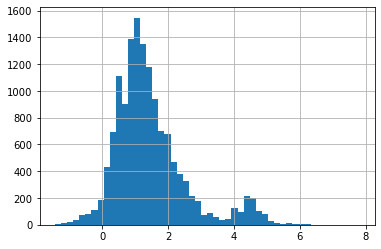

In [131]:
df_Simple['Magnitude'].hist(bins=50)

It appears there are two different peaks here. That's interesting. Why is it not a simple bell curve like figure?

(Reference to Jurassic Park here.)

This is because our data comes from at least two different "families". In this context, this means the numerical magnitude we read from each row might be measured in a different way. Indeed, the column "magType" keeps a record of the algorithm/method used to calculated the magnitude.

Let's group data that has the same "magType" together and count how many of each type we have.

In [133]:
dfGroupByMagnitudeTypes = df_Earthquakes.groupby('magType')
dfGroupByMagnitudeTypes.count()

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms,net,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
magType,,,,,,,,,,,,,,,,,,,,,
mb,807,807,807,807,807,0,807,807,807,807,...,807,807,807,807,807,807,807,807,807,807
mb_lg,19,19,19,19,19,0,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
md,3341,3341,3341,3341,3341,3341,3341,2979,3341,3341,...,3341,3341,3341,3341,3341,3045,3341,3341,3341,3341
mh,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,0,4,4,4,4
ml,9929,9929,9929,9929,9929,6874,7128,6638,9929,9929,...,9929,9929,9929,4266,9929,5064,5081,9929,9929,9929
mw,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,0,8,8,8,8
mwr,24,24,24,24,24,0,24,24,24,24,...,24,24,24,24,24,20,20,24,24,24
mww,99,99,99,99,99,0,98,98,99,99,...,99,99,99,98,99,98,98,99,99,99


Next, we will plot the same histogram but using only one type of measurement. (To be completed)

## Stock market data

Next, we move onto downloading stock market data from Yahoo Finance.

In [45]:
df_Google = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/GOOG?period1=1564943294&period2=1596565694&interval=1d&events=history")
df_Google

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-05,1170.040039,1175.239990,1140.140015,1152.319946,1152.319946,2597500
1,2019-08-06,1163.310059,1179.959961,1160.000000,1169.949951,1169.949951,1709400
2,2019-08-07,1156.000000,1178.444946,1149.624023,1173.989990,1173.989990,1444300
3,2019-08-08,1182.829956,1205.010010,1173.020020,1204.800049,1204.800049,1468000
4,2019-08-09,1197.989990,1203.880005,1183.603027,1188.010010,1188.010010,1065700
...,...,...,...,...,...,...,...
248,2020-07-29,1506.319946,1531.251953,1501.329956,1522.020020,1522.020020,1106500
249,2020-07-30,1497.000000,1537.869995,1492.219971,1531.449951,1531.449951,1671400
250,2020-07-31,1505.010010,1508.949951,1454.030029,1482.959961,1482.959961,3439900
251,2020-08-03,1486.640015,1490.469971,1465.640015,1474.449951,1474.449951,2330200


In [30]:
df_Apple = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1564943854&period2=1596566254&interval=1d&events=history")
df_Apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-05,197.990005,198.649994,192.580002,193.339996,191.059784,52393000
1,2019-08-06,196.309998,198.070007,194.039993,197.000000,194.676620,35824800
2,2019-08-07,195.410004,199.559998,193.820007,199.039993,196.692566,33364400
3,2019-08-08,200.199997,203.529999,199.389999,203.429993,201.030792,27009500
4,2019-08-09,201.300003,202.759995,199.289993,200.990005,199.374222,24619700
...,...,...,...,...,...,...,...
248,2020-07-29,375.000000,380.920013,374.850006,380.160004,380.160004,22582300
249,2020-07-30,376.750000,385.190002,375.070007,384.760010,384.760010,39532500
250,2020-07-31,411.540009,425.660004,403.299988,425.040009,425.040009,93584200
251,2020-08-03,432.799988,446.549988,431.570007,435.750000,435.750000,76955100


<AxesSubplot:>

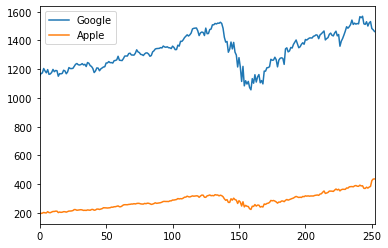

In [139]:
df_GoogleClose = df_Google[['Close']].rename(columns = {'Close': 'Google'})
df_AppleClose = df_Apple[['Close']].rename(columns = {'Close': 'Apple'})

ax = df_GoogleClose.plot()
df_AppleClose.plot(ax=ax)

## Stock Market and COVID-19

In [97]:
df_Covid = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/full_data.csv")
df_Covid

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2019-12-31,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2020-01-01,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2020-01-02,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2020-01-03,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2020-01-04,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
34643,2020-07-31,Zimbabwe,213.0,12.0,3092.0,53.0,968.0,25.0,1730.0,30.0
34644,2020-08-01,Zimbabwe,77.0,14.0,3169.0,67.0,873.0,35.0,1749.0,43.0
34645,2020-08-02,Zimbabwe,490.0,2.0,3659.0,69.0,1225.0,35.0,2181.0,44.0
34646,2020-08-03,Zimbabwe,262.0,1.0,3921.0,70.0,1409.0,36.0,2310.0,45.0


In [142]:
df_Covid.loc[(df_Covid.location == 'World')]

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
34037,2019-12-31,World,27.0,0.0,27.0,0.0,NaN,NaN,NaN,NaN
34038,2020-01-01,World,0.0,0.0,27.0,0.0,NaN,NaN,NaN,NaN
34039,2020-01-02,World,0.0,0.0,27.0,0.0,NaN,NaN,NaN,NaN
34040,2020-01-03,World,17.0,0.0,44.0,0.0,NaN,NaN,NaN,NaN
34041,2020-01-04,World,0.0,0.0,44.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
34250,2020-07-31,World,290453.0,6430.0,17301607.0,673285.0,1819571.0,40171.0,3512506.0,83551.0
34251,2020-08-01,World,278841.0,6209.0,17580448.0,679494.0,1814526.0,40015.0,3536798.0,82296.0
34252,2020-08-02,World,262059.0,5778.0,17842507.0,685272.0,1817102.0,40015.0,3568888.0,83105.0
34253,2020-08-03,World,222783.0,3971.0,18065290.0,689243.0,1808071.0,40019.0,3582333.0,83227.0
